In [1]:
%matplotlib inline

# import warnings
# warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict

from itertools import cycle
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
# hyperparameter tuning ## To search for the most suitable parameters for the Decision Tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from yellowbrick import ROCAUC
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn import tree
#import pydotplus
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from scikitplot.metrics import plot_roc

In [2]:
from sklearn.decomposition import PCA
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from scikitplot.metrics import plot_roc
from scipy.stats import uniform, randint

from sklearn.neural_network import MLPClassifier

In [3]:
# Neural Networks
import tensorflow as tf
from tensorflow import keras
from sklearn.neural_network import MLPClassifier, MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.regularizers import L1, L2
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.layers import Dropout
from keras.regularizers import l2, l1

LOAD

In [4]:
#df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_SenzaOutlier.csv') 
df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_post_encoding.csv') 
df.shape

(87950, 24)

In [5]:
df = df.drop([ 'popularity','valence', 'energy'], axis = 1)  #'valence', 'energy',
df.head()

,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,time_signature_confidence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
0,0.797420,-0.186041,-0.588997,1.938632,0.659428,1.766613,-0.889812,2.141972,-1.417948,0.787971,...,0.079080,1.152045,0.157456,-0.277164,0,0,1,3,0.007447,nervous
1,2.550119,1.063136,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-0.080843,0.765656,-1.999208,...,0.430642,2.193447,-0.067569,-0.275450,0,5,0,4,0.007447,bored
2,0.543118,1.355375,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.147003,1.326491,-1.946310,...,1.369974,0.435994,-0.236338,-0.292966,0,7,0,3,0.007447,nervous
3,1.592682,0.633373,-1.010613,0.366106,-0.822027,1.836646,-0.443037,0.221461,1.442640,-1.916735,...,-0.041770,1.533392,-0.573877,-0.286607,0,6,0,4,0.007447,nervous
4,0.385608,1.126168,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-0.081281,1.442640,0.787971,...,-0.283469,0.335164,-0.180082,-0.273545,0,11,0,4,0.007447,nervous


In [6]:
from sklearn.preprocessing import LabelEncoder

# Inizializza il LabelEncoder
label_encoder = LabelEncoder()

# Codifica le etichette di emozione nel DataFrame
df['emotion'] = label_encoder.fit_transform(df['emotion'])
df

,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,time_signature_confidence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
0,0.797420,-0.186041,-0.588997,1.938632,0.659428,1.766613,-0.889812,2.141972,-1.417948,0.787971,...,0.079080,1.152045,0.157456,-0.277164,0,0,1,3,0.007447,5
1,2.550119,1.063136,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-0.080843,0.765656,-1.999208,...,0.430642,2.193447,-0.067569,-0.275450,0,5,0,4,0.007447,1
2,0.543118,1.355375,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.147003,1.326491,-1.946310,...,1.369974,0.435994,-0.236338,-0.292966,0,7,0,3,0.007447,5
3,1.592682,0.633373,-1.010613,0.366106,-0.822027,1.836646,-0.443037,0.221461,1.442640,-1.916735,...,-0.041770,1.533392,-0.573877,-0.286607,0,6,0,4,0.007447,5
4,0.385608,1.126168,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-0.081281,1.442640,0.787971,...,-0.283469,0.335164,-0.180082,-0.273545,0,11,0,4,0.007447,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87945,-0.061779,-0.564232,1.637100,0.608776,-0.940847,1.534564,1.111459,1.736284,0.934902,0.787971,...,-1.805076,0.718447,1.320089,1.250663,1,5,0,4,0.003343,3
87946,-0.110350,0.581802,0.936856,-1.645092,0.136492,-0.616040,-1.018318,-0.756126,0.878487,0.787971,...,0.134011,-0.458242,-0.067569,-0.300284,1,9,1,4,0.003343,5
87947,-0.235874,1.424137,0.749566,-0.122951,-0.736753,-0.605343,-0.200804,0.255855,1.216979,0.634326,...,-0.992088,-0.027072,1.929533,1.725765,1,11,0,4,0.003343,7
87948,-0.073532,0.507310,1.449257,-0.592442,0.139463,-0.616016,-2.392504,-0.483129,0.672737,0.787971,...,0.513040,-0.340721,-0.320723,-0.301306,0,0,1,4,0.003343,3


In [7]:

# Costruisci il mapping
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Stampa il mapping
print("Mapping delle emozioni:")
for emotion, code in mapping.items():
    print(f"{emotion}: {code}")

# Decodifica un esempio
decoded_code = 1  # Esempio di codice da decodificare
decoded_emotion = label_encoder.inverse_transform([decoded_code])[0]
print(f"\nDecodificato il codice {decoded_code}: {decoded_emotion}")


Mapping delle emozioni:
angry: 0
bored: 1
calm: 2
excited: 3
happy: 4
nervous: 5
peaceful: 6
pleased: 7
relaxed: 8
sad: 9
sleepy: 10

Decodificato il codice 1: bored


In [8]:
mapping

{'angry': 0,
 'bored': 1,
 'calm': 2,
 'excited': 3,
 'happy': 4,
 'nervous': 5,
 'peaceful': 6,
 'pleased': 7,
 'relaxed': 8,
 'sad': 9,
 'sleepy': 10}

In [9]:
df['emotion'].value_counts()

emotion
2     18414
3     13309
4     11751
0      9847
7      8842
1      7145
5      7077
9      5924
8      3136
10     2055
6       450
Name: count, dtype: int64

PARTITION

In [10]:
attributes = [col for col in df.columns if col != "emotion"]

X = df[attributes].values
y = np.array(df["emotion"])  # oppure y = df['emotion].values

X.shape, y.shape

((87950, 20), (87950,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Usando l'opzione stratify=y, garantisci che la suddivisione mantenga la stessa proporzione di classi tra set di addestramento e di test, utile quando hai un set di dati sbilanciato

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70360, 20), (17590, 20), (70360,), (17590,))

In [12]:
pd.Series(y_train).value_counts()
pd.Series(y_test).value_counts()

2     3683
3     2662
4     2350
0     1970
7     1768
1     1429
5     1415
9     1185
8      627
10     411
6       90
Name: count, dtype: int64

# 1- PERCEPTRON

In [13]:
from sklearn.linear_model import Perceptron

In [70]:
#run in 107 min minuti

perceptron = Perceptron()

param_list = {'alpha': [0.0001, 0.001, 0.01, 0.1],
            'max_iter': [50, 100, 500, 1000, 2000, 5000],
            'tol': [1e-4, 1e-3, 1e-2, 1e-1], # Tolleranza per i criteri di arresto
            'penalty': [None, 'l2', 'l1', 'elasticnet'],
            'class_weight': [None, 'balanced'],  # Pesi delle classi
            'eta0': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}  # Learning rate


grid_search = GridSearchCV(perceptron, param_grid = param_list , cv=5, scoring='accuracy',  n_jobs=-1)


grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.001,
 'class_weight': None,
 'eta0': 0.01,
 'max_iter': 50,
 'penalty': 'l1',
 'tol': 0.0001}

In [71]:
ppn = grid_search.best_estimator_
ppn.fit(X_train, y_train)

y_pred_ppn = ppn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_ppn))
print('F1-score %s' % f1_score(y_test, y_pred_ppn, average='weighted'))
print(classification_report(y_test, y_pred_ppn, target_names=mapping))

Accuracy 0.2649801023308698
F1-score 0.25447512770120856
              precision    recall  f1-score   support

       angry       0.44      0.39      0.41      1970
       bored       0.18      0.46      0.26      1429
        calm       0.32      0.09      0.14      3683
     excited       0.32      0.45      0.37      2662
       happy       0.32      0.12      0.18      2350
     nervous       0.11      0.18      0.14      1415
    peaceful       0.00      0.00      0.00        90
     pleased       0.25      0.13      0.17      1768
     relaxed       0.13      0.48      0.21       627
         sad       0.74      0.54      0.62      1185
      sleepy       0.18      0.01      0.02       411

    accuracy                           0.26     17590
   macro avg       0.27      0.26      0.23     17590
weighted avg       0.31      0.26      0.25     17590



c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
ppn

Perceptron(alpha=0.001, eta0=0.01, max_iter=50, penalty='l1', tol=0.0001)

In [72]:
#Calcola l'accuratezza e altre metriche di valutazione del modello sia sui dati di addestramento che sui dati di test.

train_accuracy = accuracy_score(y_train, ppn.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_ppn)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.2638288800454804
Accuratezza sul set di test: 0.2649801023308698


Il problema principale è che il perceptron implementato in scikit-learn (sklearn.linear_model.Perceptron) non supporta il metodo predict_proba, poiché è un classificatore lineare che non fornisce probabilità, ma solo etichette di classe. Per tracciare una curva ROC, hai bisogno delle probabilità di previsione.

# MLP - finire notebook secondo schema report

Esperimenti e Validazione: La strategia più comune è quella di sperimentare con diverse configurazioni e utilizzare la validazione incrociata (cross-validation) per valutare le prestazioni del modello. Questo approccio empirico consente di trovare una configurazione che funziona bene per il dataset specifico.

Regola Empirica: Alcune regole empiriche suggeriscono che il numero di neuroni nei livelli nascosti dovrebbe essere compreso tra il numero di neuroni nell'input e il numero di neuroni nell'output. Un'approssimazione comune è:

Per reti con un solo livello nascosto, una buona partenza potrebbe essere di avere un numero di neuroni nascosti pari alla media del numero di neuroni dell'input e dell'output.
Per reti con più livelli nascosti, si può iniziare con un numero decrescente di neuroni in ciascun livello successivo, come hai fatto nel tuo esempio.

 Ecco i principali valori di default per MLPClassifier in Scikit-Learn:

- hidden_layer_sizes: (100,) # Numero di neuroni nei livelli nascosti. Il default è una singola hidden layer con 100 neuroni.
- activation: 'relu'. Funzione di attivazione per i livelli nascosti. Opzioni: 'identity', 'logistic', 'tanh', 'relu'.
- solver: 'adam'.Algoritmo per l'ottimizzazione del peso. Opzioni: 'lbfgs', 'sgd', 'adam'.
- alpha: 0.0001. Parametro di regolarizzazione L2 (penalty term).
- batch_size: 'auto'. Dimensione dei mini-batch per l'addestramento. Il valore predefinito 'auto' corrisponde a min(200, n_samples).
- learning_rate: 'constant'. Programma di adattamento del learning rate. Opzioni: 'constant', 'invscaling', 'adaptive'.
- max_iter: 200. Numero massimo di epoche (iterazioni) per l'addestramento.
- tol: 0.0001. Tolleranza per la miglioramento della funzione obiettivo. Se il miglioramento è inferiore a questa soglia, l'addestramento si ferma.
- momentum: 0.9. Momento utilizzato per il gradient descent (solo per solver 'sgd').


In [40]:
#prova con solo valori di default - 1 minuto

mlp = MLPClassifier()

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=mapping))


Accuracy 0.47998862990335417
F1-score 0.47221749148606523
              precision    recall  f1-score   support

       angry       0.60      0.50      0.54      1970
       bored       0.52      0.40      0.45      1429
        calm       0.43      0.61      0.51      3683
     excited       0.43      0.49      0.46      2662
       happy       0.45      0.52      0.48      2350
     nervous       0.47      0.26      0.34      1415
    peaceful       0.36      0.34      0.35        90
     pleased       0.47      0.29      0.36      1768
     relaxed       0.44      0.24      0.31       627
         sad       0.71      0.76      0.74      1185
      sleepy       0.42      0.37      0.40       411

    accuracy                           0.48     17590
   macro avg       0.48      0.43      0.45     17590
weighted avg       0.49      0.48      0.47     17590



c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
train_accuracy = accuracy_score(y_train, mlp.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.49998578737919275
Accuratezza sul set di test: 0.47998862990335417


prova 1 layer

In [13]:
# RUN in 19 min 
param_dist = {
    'hidden_layer_sizes':  [(16,), (32,), (64,), (100,), (128,)],
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'solver': ['sgd', 'adam'],
    'batch_size': [16,32,64],
    'momentum': [0.1,0.5,0.9],
    'learning_rate': ['constant','adaptive'] ,
    'alpha': [0.001,0.01,0.1,0.2]
}

# max_iter: default 200. Numero massimo di epoche (iterazioni) per l'addestramento.

rs = RandomizedSearchCV(MLPClassifier(), param_dist, scoring='accuracy', n_iter=10, cv=5, random_state=0, n_jobs = -1)
rs.fit(X_train, y_train)

print("Best parameters: ", rs.best_params_)
print("Best score: ", rs.best_score_)

Best parameters:  {'solver': 'adam', 'momentum': 0.5, 'learning_rate': 'constant', 'hidden_layer_sizes': (128,), 'batch_size': 32, 'alpha': 0.01, 'activation': 'relu'}
Best score:  0.479206935758954


In [14]:
#alleno il modello con i migliori parametri
mlp1 = rs.best_estimator_
mlp1.fit(X_train, y_train)

y_pred_mlp1 = mlp1.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_mlp1))
print('F1-score %s' % f1_score(y_test, y_pred_mlp1, average='weighted'))
print(classification_report(y_test, y_pred_mlp1, target_names=mapping))

Accuracy 0.4801023308698124
F1-score 0.473962998453792
              precision    recall  f1-score   support

       angry       0.54      0.58      0.56      1970
       bored       0.49      0.47      0.48      1429
        calm       0.44      0.56      0.49      3683
     excited       0.43      0.49      0.46      2662
       happy       0.50      0.42      0.46      2350
     nervous       0.40      0.35      0.37      1415
    peaceful       0.36      0.09      0.14        90
     pleased       0.46      0.32      0.38      1768
     relaxed       0.41      0.29      0.34       627
         sad       0.71      0.79      0.75      1185
      sleepy       0.43      0.25      0.32       411

    accuracy                           0.48     17590
   macro avg       0.47      0.42      0.43     17590
weighted avg       0.48      0.48      0.47     17590



In [15]:
#Calcola l'accuratezza e altre metriche di valutazione del modello sia sui dati di addestramento che sui dati di test.

train_accuracy = accuracy_score(y_train, mlp1.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_mlp1)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)


Accuratezza sul set di addestramento: 0.5016344513928368
Accuratezza sul set di test: 0.4801023308698124


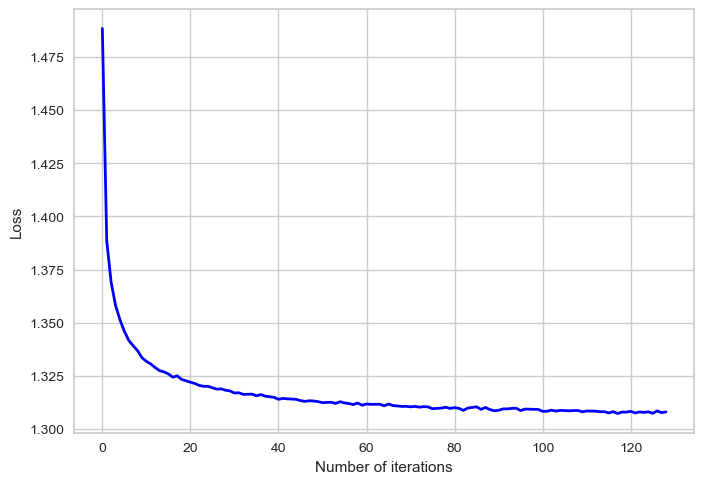

In [19]:
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
#plt.title('Loss Curve for MLP Model with 3 hidden layers ')
plt.plot(mlp1.loss_curve_, color='blue', linestyle='-', linewidth=2)
plt.show()


prova 2 layer



In [20]:
# RUN in 72 minuti

param_dist = {
    'hidden_layer_sizes': [(32, 16), (64, 32), (100,100), (128,64), (256,128)],   
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'solver': ['sgd', 'adam'],
    'batch_size': [16,32,64],
    'momentum': [0.1,0.5,0.9],
    'learning_rate': ['constant','adaptive'] ,
    'alpha': [0.001,0.01,0.1,0.2]
}

# max_iter: default 200. Numero massimo di epoche (iterazioni) per l'addestramento.

rs = RandomizedSearchCV(MLPClassifier(), param_dist, scoring='accuracy', n_iter=10, cv=5, random_state=0, n_jobs = -1)
rs.fit(X_train, y_train)

print("Best parameters: ", rs.best_params_)
print("Best score: ", rs.best_score_)

Best parameters:  {'solver': 'adam', 'momentum': 0.1, 'learning_rate': 'constant', 'hidden_layer_sizes': (64, 32), 'batch_size': 64, 'alpha': 0.01, 'activation': 'tanh'}
Best score:  0.47868106878908473


In [21]:
#alleno il modello con i migliori parametri
mlp2 = rs.best_estimator_
mlp2.fit(X_train, y_train)

y_pred_mlp2 = mlp2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_mlp2))
print('F1-score %s' % f1_score(y_test, y_pred_mlp2, average='weighted'))
print(classification_report(y_test, y_pred_mlp2, target_names=mapping))

Accuracy 0.47993177942012505
F1-score 0.4703505450184722
              precision    recall  f1-score   support

       angry       0.58      0.55      0.57      1970
       bored       0.51      0.44      0.47      1429
        calm       0.41      0.66      0.51      3683
     excited       0.44      0.49      0.46      2662
       happy       0.51      0.41      0.45      2350
     nervous       0.44      0.27      0.33      1415
    peaceful       0.36      0.20      0.26        90
     pleased       0.47      0.28      0.35      1768
     relaxed       0.51      0.21      0.30       627
         sad       0.72      0.76      0.74      1185
      sleepy       0.40      0.32      0.36       411

    accuracy                           0.48     17590
   macro avg       0.49      0.42      0.44     17590
weighted avg       0.49      0.48      0.47     17590



In [22]:
#Calcola l'accuratezza e altre metriche di valutazione del modello sia sui dati di addestramento che sui dati di test.

train_accuracy = accuracy_score(y_train, mlp2.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_mlp2)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)


Accuratezza sul set di addestramento: 0.5096077316657192
Accuratezza sul set di test: 0.47993177942012505


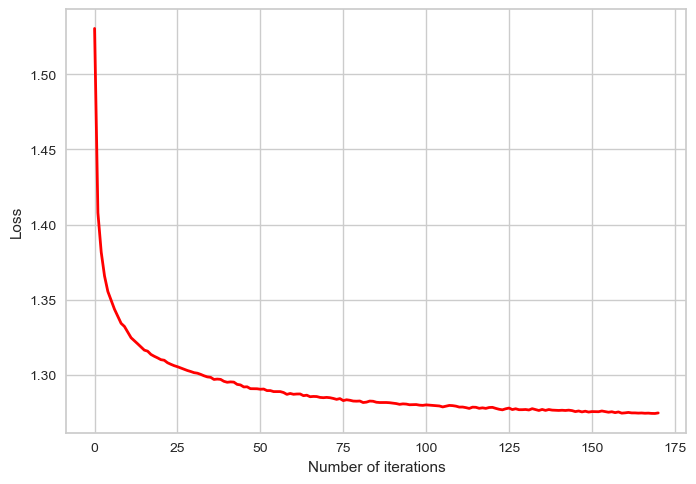

In [23]:
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
#plt.title('Loss Curve for MLP Model with 3 hidden layers ')
plt.plot(mlp2.loss_curve_, color='red', linestyle='-', linewidth=2)
plt.show()

prova 3 layer

In [30]:
# # run in 5 min
 
# mlp3 = MLPClassifier(hidden_layer_sizes = (64, 32, 16), activation = 'relu', solver= 'adam',
#                          batch_size = 64, learning_rate='constant', alpha= 0.01 ) #moemntum = 0.1


# mlp3.fit(X_train, y_train)

# y_pred_mlp3 = mlp3.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred_mlp3))
# print('F1-score %s' % f1_score(y_test, y_pred_mlp3, average='weighted'))
# print(classification_report(y_test, y_pred_mlp3, target_names=mapping))

Accuracy 0.47885162023877204
F1-score 0.4729838050992406
              precision    recall  f1-score   support

       angry       0.56      0.57      0.56      1970
       bored       0.48      0.46      0.47      1429
        calm       0.43      0.55      0.48      3683
     excited       0.47      0.43      0.45      2662
       happy       0.51      0.43      0.47      2350
     nervous       0.41      0.33      0.37      1415
    peaceful       0.39      0.31      0.35        90
     pleased       0.41      0.40      0.41      1768
     relaxed       0.43      0.28      0.34       627
         sad       0.64      0.84      0.73      1185
      sleepy       0.44      0.26      0.33       411

    accuracy                           0.48     17590
   macro avg       0.47      0.44      0.45     17590
weighted avg       0.48      0.48      0.47     17590



c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuratezza sul set di addestramento: 0.5086981239340534
Accuratezza sul set di test: 0.47942012507106313

In [32]:
# RUN in 48 min!!
param_dist = {
    'hidden_layer_sizes': [(64, 32, 16), (128, 64, 32)],
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'solver': ['sgd', 'adam'],
    'batch_size': [16,32,64],
    'momentum': [0.1,0.5,0.9],
    'learning_rate': ['constant','adaptive'] ,
    'alpha': [0.001,0.01,0.1,0.2]
}

# max_iter: default 200. Numero massimo di epoche (iterazioni) per l'addestramento.

rs = RandomizedSearchCV(MLPClassifier(), param_dist, scoring='accuracy', n_iter=10, cv=5, random_state=0, n_jobs = -1)
rs.fit(X_train, y_train)

print("Best parameters: ", rs.best_params_)
print("Best score: ", rs.best_score_)

Best parameters:  {'solver': 'sgd', 'momentum': 0.5, 'learning_rate': 'constant', 'hidden_layer_sizes': (64, 32, 16), 'batch_size': 32, 'alpha': 0.001, 'activation': 'tanh'}
Best score:  0.4741614553723707


c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
#alleno il modello con i migliori parametri
mlp3 = rs.best_estimator_
mlp3.fit(X_train, y_train)

y_pred_mlp3 = mlp3.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_mlp3))
print('F1-score %s' % f1_score(y_test, y_pred_mlp3, average='weighted'))
print(classification_report(y_test, y_pred_mlp3, target_names=mapping))

Accuracy 0.47578169414440025
F1-score 0.46891280279880204
              precision    recall  f1-score   support

       angry       0.58      0.51      0.54      1970
       bored       0.54      0.40      0.46      1429
        calm       0.43      0.57      0.49      3683
     excited       0.44      0.47      0.45      2662
       happy       0.45      0.53      0.49      2350
     nervous       0.43      0.31      0.36      1415
    peaceful       0.35      0.07      0.11        90
     pleased       0.44      0.33      0.37      1768
     relaxed       0.42      0.25      0.31       627
         sad       0.70      0.78      0.74      1185
      sleepy       0.38      0.21      0.27       411

    accuracy                           0.48     17590
   macro avg       0.47      0.40      0.42     17590
weighted avg       0.48      0.48      0.47     17590



c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
#Calcola l'accuratezza e altre metriche di valutazione del modello sia sui dati di addestramento che sui dati di test.

train_accuracy = accuracy_score(y_train, mlp3.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_mlp3)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)


Accuratezza sul set di addestramento: 0.49208357021034677
Accuratezza sul set di test: 0.47578169414440025


PLOT MIGLIORE TRA mlp1 - mlp2 - mlp3

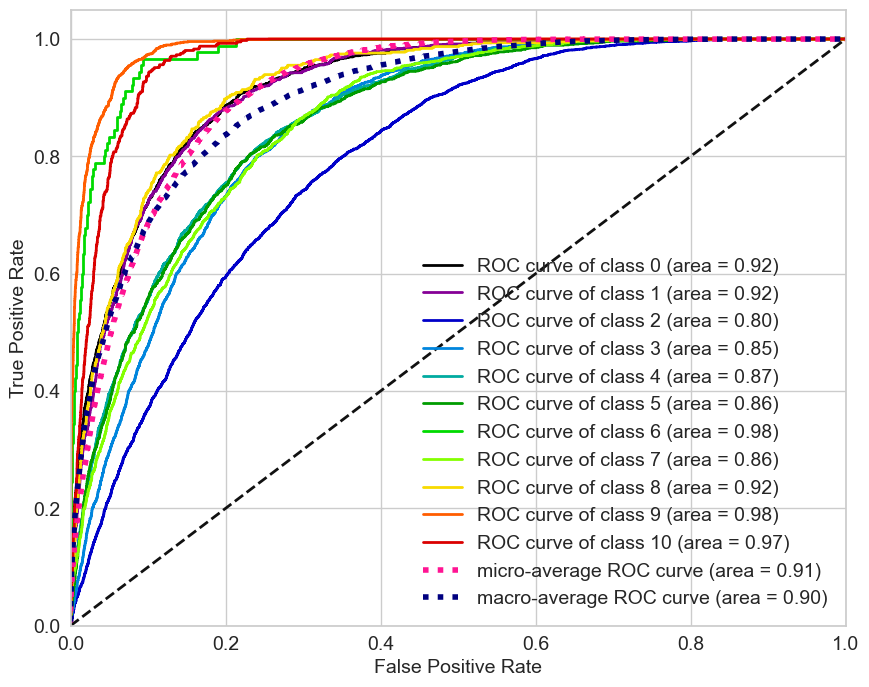

In [35]:
from scikitplot.metrics import plot_roc

#metto migliore qui  mlp1 - mlp2 - mlp3
clf_to_plot = mlp1
y_pred = y_pred_mlp1

#----------


y_score = clf_to_plot.predict_proba(X_test)

plot_roc(y_test, y_score, figsize=(10,8), title_fontsize=15, text_fontsize=14)
plt.title("")
plt.show()

array([[1139,   18,   81,  540,   66,  117,    0,    6,    2,    1,    0],
       [   6,  671,  440,    3,    2,  140,    0,   19,   23,  108,   17],
       [  99,  332, 2062,  237,  232,  291,    2,  255,   92,   59,   22],
       [ 573,    1,  225, 1310,  392,   98,    0,   60,    3,    0,    0],
       [ 133,    1,  291,  706,  984,   44,    0,  181,   10,    0,    0],
       [ 135,  100,  479,  131,   36,  493,    0,   33,    3,    5,    0],
       [   0,    5,    6,    0,    0,    0,    8,    0,   15,   23,   33],
       [  22,   24,  714,   90,  254,   34,    0,  558,   71,    0,    1],
       [   1,   32,  276,    4,    5,    2,    2,   90,  183,   12,   20],
       [   4,  144,   44,    0,    0,    2,    3,    0,    9,  934,   45],
       [   0,   35,   63,    0,    0,    0,    7,    0,   34,  169,  103]],
      dtype=int64)

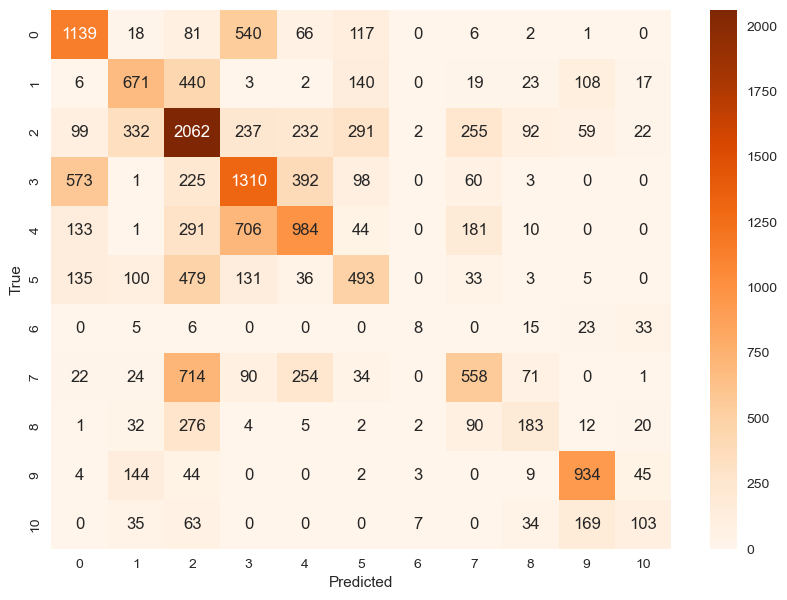

In [43]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d',cmap="Oranges")
plt.xlabel('Predicted')
plt.ylabel('True')
cm

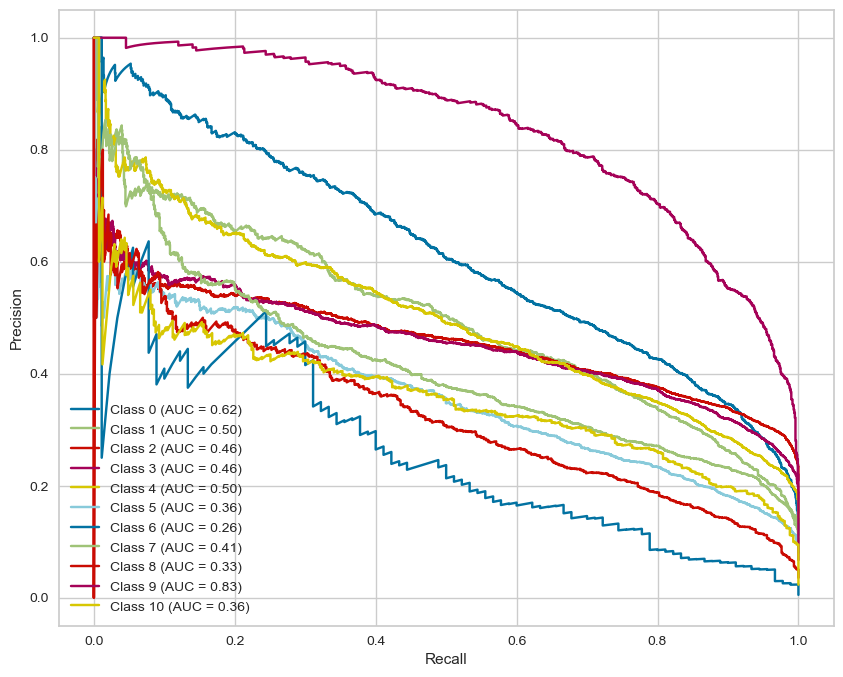

In [37]:
# Make predictions on test data
y_pred_proba = clf_to_plot.predict_proba(X_test)  # Probability estimates of each class

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Compute precision and recall for each class
precision = dict()
recall = dict()
thresholds = dict()
auc_score = dict()

for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc_score[i] = auc(recall[i], precision[i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {auc_score[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve for Multiclass Classification')
plt.legend(loc='lower left')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

### plot loss curve al variare della activation function 1 layer

In [13]:
# RUN in 19 min 
param_dist = {
    'hidden_layer_sizes':  [(128,)],
    'activation': ['logistic'],
    'solver': ['sgd', 'adam'],
    'batch_size': [16,32,64],
    'momentum': [0.1,0.5,0.9],
    'learning_rate': ['constant','adaptive'] ,
    'alpha': [0.001,0.01,0.1,0.2]
}

# max_iter: default 200. Numero massimo di epoche (iterazioni) per l'addestramento.

rs1 = RandomizedSearchCV(MLPClassifier(), param_dist, scoring='accuracy', n_iter=10, cv=5, random_state=0, n_jobs = -1)
rs1.fit(X_train, y_train)
clf1 = rs1.best_estimator_
clf1.fit(X_train, y_train)



MLPClassifier(activation='logistic', alpha=0.001, batch_size=16,
              hidden_layer_sizes=(128,), learning_rate='adaptive',
              momentum=0.1)

In [14]:
# RUN in 19 min 
param_dist = {
    'hidden_layer_sizes':  [(128,)],
    'activation': ['tanh' ],
    'solver': ['sgd', 'adam'],
    'batch_size': [16,32,64],
    'momentum': [0.1,0.5,0.9],
    'learning_rate': ['constant','adaptive'] ,
    'alpha': [0.001,0.01,0.1,0.2]
}


rs2 = RandomizedSearchCV(MLPClassifier(), param_dist, scoring='accuracy', n_iter=10, cv=5, random_state=0, n_jobs = -1)
rs2.fit(X_train, y_train)
clf2 = rs2.best_estimator_
clf2.fit(X_train, y_train)

c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.001, batch_size=32,
              hidden_layer_sizes=(128,), solver='sgd')

In [15]:
# RUN in 19 min 
param_dist = {
    'hidden_layer_sizes':  [(128,)],
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'batch_size': [16,32,64],
    'momentum': [0.1,0.5,0.9],
    'learning_rate': ['constant','adaptive'] ,
    'alpha': [0.001,0.01,0.1,0.2]
}


rs3 = RandomizedSearchCV(MLPClassifier(), param_dist, scoring='accuracy', n_iter=10, cv=5, random_state=0, n_jobs = -1)
rs3.fit(X_train, y_train)
clf3 = rs3.best_estimator_
clf3.fit(X_train, y_train)

MLPClassifier(alpha=0.01, batch_size=32, hidden_layer_sizes=(128,),
              learning_rate='adaptive')

In [16]:
# RUN in 19 min 
param_dist = {
    'hidden_layer_sizes':  [(128,)],
    'activation': ['identity'],
    'solver': ['sgd', 'adam'],
    'batch_size': [16,32,64],
    'momentum': [0.1,0.5,0.9],
    'learning_rate': ['constant','adaptive'] ,
    'alpha': [0.001,0.01,0.1,0.2]
}

rs4 = RandomizedSearchCV(MLPClassifier(), param_dist, scoring='accuracy', n_iter=10, cv=5, random_state=0, n_jobs = -1)
rs4.fit(X_train, y_train)
clf4 = rs4.best_estimator_
clf4.fit(X_train, y_train)

MLPClassifier(activation='identity', alpha=0.001, batch_size=32,
              hidden_layer_sizes=(128,), learning_rate='adaptive',
              solver='sgd')

In [21]:
# # run in 5 

# clf1 = MLPClassifier(solver= 'adam', momentum= 0.5, learning_rate= 'constant', hidden_layer_sizes=  (128,), batch_size= 32, alpha= 0.01, activation='relu', random_state=42 )
# clf2 = MLPClassifier(solver= 'adam', momentum= 0.5, learning_rate= 'constant', hidden_layer_sizes=  (128,), batch_size= 32, alpha= 0.01, activation='identity', random_state=42)
clf3 = MLPClassifier(solver= 'adam', momentum= 0.5, learning_rate= 'constant', hidden_layer_sizes=  (128,), batch_size= 32, alpha= 0.01, activation='relu', random_state=0)
# clf4 = MLPClassifier(solver= 'adam', momentum= 0.5, learning_rate= 'constant', hidden_layer_sizes=  (128,), batch_size= 32, alpha= 0.01, activation='logistic', random_state=42)

# clf1.fit(X_train, y_train)
# clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
# clf4.fit(X_train, y_train)

# # y_pred = mlp.predict(X_test)

# # print('Accuracy %s' % accuracy_score(y_test, y_pred))
# # print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
# # print(classification_report(y_test, y_pred, target_names=mapping))


MLPClassifier(alpha=0.01, batch_size=32, hidden_layer_sizes=(128,),
              momentum=0.5, random_state=0)

In [26]:
clf4

MLPClassifier(activation='identity', alpha=0.001, batch_size=32,
              hidden_layer_sizes=(128,), learning_rate='adaptive',
              solver='sgd')

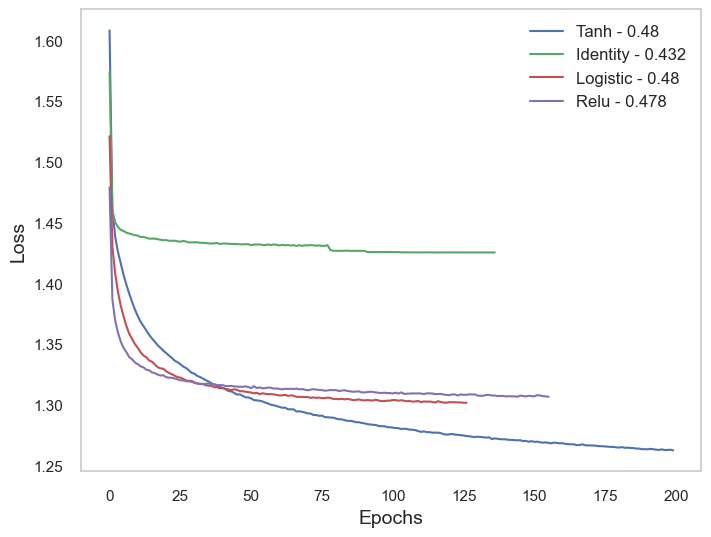

In [29]:
# clf1 - logistic
# clf2 - tanh
# clf3 - relu
# clf4 - identity

sns.set_palette("husl")  # Puoi scegliere tra diverse palette come "deep", "muted", "bright", "dark", ecc.

# Configura lo stile di Seaborn
sns.set(style="whitegrid")

# Crea il grafico
plt.figure(figsize=(8, 6))

plt.plot(clf2.loss_curve_, label="Tanh - " + str(round(clf2.score(X_test, y_test), 3)), color='b')
plt.plot(clf4.loss_curve_, label="Identity - " + str(round(clf4.score(X_test, y_test), 3)), color='g')
plt.plot(clf1.loss_curve_, label="Logistic - " + str(round(clf1.score(X_test, y_test), 3)), color='r')
plt.plot(clf3.loss_curve_, label="Relu - " + str(round(clf3.score(X_test, y_test), 3)), color='m')

# Aggiungere la legenda
plt.legend(loc="best", fontsize=12)

# Aggiungere etichette e titolo
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
#plt.title("Convergence of Different Activation Functions", fontsize=16)

# Aggiungere griglia
plt.grid(False)

# Mostrare il grafico
plt.show()


# 2-  Keras


In [14]:
import keras
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow import keras

**Hyper-parameter tuning**

In [58]:
#uso train e validation per il modello
x_train1, x_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [60]:
#OPZIONE SENZA USO DI MOMENTUM 

# def build_model(meta, hidden_layer_sizes, activation):
#     n_features_in_ = meta["n_features_in_"]
#     n_classes_ = meta["n_classes_"]
#     model = keras.models.Sequential()   ##sequential
#     model.add(keras.layers.Input(shape=(n_features_in_,)))
#     for hidden_layer_size in hidden_layer_sizes:
#         model.add(keras.layers.Dense(hidden_layer_size, activation=activation))
#     model.add(keras.layers.Dense(n_classes_, activation="softmax"))
#     return model

# nn = KerasClassifier(
#     model=build_model,
#     loss="sparse_categorical_crossentropy",
#     verbose=False)


# params = {
#     'optimizer__learning_rate': [0.001, 0.01, 0.1],
#     'model__hidden_layer_sizes': [(32,), (64,), (128,),  # Configurazioni a un livello
#                                 (32, 16), (64, 32), (128, 64),   # Configurazioni a due livelli
#                                 (64, 16), (128, 32),   # Altre configurazioni a due livelli
#                                 (128, 64, 32)],
#     'model__activation': ['relu', 'tanh'],
#     'optimizer': ["adam", "sgd"],
#     'epochs': [10, 50, 100, 200],
#     'batch_size': [32,64,128]
#     #'momentum' : [0.1, 0.3, 0.5, 0.9]  
# }

# rs_keras = RandomizedSearchCV(nn, params, scoring='accuracy', verbose=True, n_iter=10, cv=3, n_jobs= -1)

In [67]:
def build_model(meta, hidden_layer_sizes, activation, optimizer, momentum=None):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    model = keras.models.Sequential()   ##sequential
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation))
    
    if optimizer.__class__.__name__ == 'SGD':
        opt = keras.optimizers.SGD(learning_rate=0.01, momentum=momentum)
    else:
        opt = optimizer
    
    model.add(keras.layers.Dense(n_classes_, activation="softmax"))
    model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    return model

nn = KerasClassifier(
    model=build_model,
    verbose=False)

params = {
    'optimizer__learning_rate': [0.001, 0.01, 0.1],
    'model__hidden_layer_sizes': [(32,), (64,), (128,),  # Configurazioni a un livello
                                (32, 16), (64, 32), (128, 64),   # Configurazioni a due livelli
                                (64, 16), (128, 32),   # Altre configurazioni a due livelli
                                (128, 64, 32)],
    'model__activation': ['relu', 'tanh'],
    'model__optimizer': [keras.optimizers.Adam(), keras.optimizers.SGD()],
    'model__momentum' : [0.1, 0.3, 0.5, 0.9],  #verifica
    'epochs': [10, 50, 100, 200],
    'batch_size': [32,64,128],
}

rs_keras = RandomizedSearchCV(nn, params, scoring='accuracy', verbose=True, n_iter=10, cv=3, n_jobs= -1)



In [68]:
# run in 27 min con parametri sopra

rs_keras.fit(x_train1, y_train1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits




RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(model=<function build_model at 0x0000025DBEBBD440>, verbose=False),
                   n_jobs=-1,
                   param_distributions={'batch_size': [32, 64, 128],
                                        'epochs': [10, 50, 100, 200],
                                        'model__activation': ['relu', 'tanh'],
                                        'model__hidden_layer_sizes': [(32,),
                                                                      (64,),
                                                                      (128,),
                                                                      (32, 16),
                                                                      (64, 32),
                                                                      (128, 64),
                                                                      (64, 16),
                                                                      (128, 32),
                                                                      (128, 64,
                                                                       32)],
                                        'model__momentum': [0.1, 0.3, 0.5, 0.9],
                                        'model__optimizer': [<keras.src.optimizers.adam.Adam object at 0x0000025DBEB0EFD0>,
                                                             <keras.src.optimizers.sgd.SGD object at 0x0000025DBEB89E90>],
                                        'optimizer__learning_rate': [0.001,
                                                                     0.01,
                                                                     0.1]},
                   scoring='accuracy', verbose=True)

In [69]:
print(rs_keras.best_score_, rs_keras.best_params_)

0.4711306363766116 {'optimizer__learning_rate': 0.01, 'model__optimizer': <keras.src.optimizers.sgd.SGD object at 0x0000025DBEB89E90>, 'model__momentum': 0.1, 'model__hidden_layer_sizes': (64, 16), 'model__activation': 'relu', 'epochs': 200, 'batch_size': 32}


In [70]:
y_pred = rs_keras.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=  mapping))

Accuracy 0.4741898806139852
F1-score 0.4647032478087942
              precision    recall  f1-score   support

       angry       0.60      0.50      0.55      1970
       bored       0.50      0.36      0.42      1429
        calm       0.43      0.61      0.50      3683
     excited       0.42      0.51      0.46      2662
       happy       0.47      0.47      0.47      2350
     nervous       0.43      0.29      0.35      1415
    peaceful       0.36      0.29      0.32        90
     pleased       0.46      0.29      0.35      1768
     relaxed       0.45      0.25      0.32       627
         sad       0.67      0.81      0.73      1185
      sleepy       0.43      0.18      0.25       411

    accuracy                           0.47     17590
   macro avg       0.47      0.41      0.43     17590
weighted avg       0.48      0.47      0.46     17590



In [71]:
# Risultato della search:

# 'optimizer__learning_rate': 0.01,
# 'model__optimizer': 'sgd',
# 'model__momentum': 0.1,
# 'model__hidden_layer_sizes': (64, 16), 
# 'model__activation': 'relu', 
# 'epochs': 200, 
# 'batch_size': 32


#Costruisco il modello migliore venuto fuori dalla randomsearch- quindi 3 layer impostati con neuroni, il primo con n feature e ultimo con softmax 

n_classes = 11

def build_model_opt(optimizer__learning_rate):

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(64, input_dim=n_feature, activation='relu')) #questo è quello successivo sono gli hidden layer
    #model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(n_classes, activation='softmax')) #questo dovrebbe essere il layer di uscita

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [72]:
# prendo  optimizer__learning_rate ed epoche da sopra

opt = 0.01
ep = 200

nn_opt = KerasClassifier(
    model=build_model_opt(opt),
    loss="sparse_categorical_crossentropy",
    epochs=ep,
    verbose=False
)

In [73]:
# 4 min
nn_opt.fit(x_train1, y_train1, validation_data=(x_val, y_val))

KerasClassifier(
	model=<keras.src.engine.sequential.Sequential object at 0x0000025DC1708290>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=sparse_categorical_crossentropy
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=False
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=200
	class_weight=None
)

In [74]:
nn_opt.model_.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1344      
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 11)                187       
                                                                 
Total params: 2571 (10.04 KB)
Trainable params: 2571 (10.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
history = nn_opt.history_
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

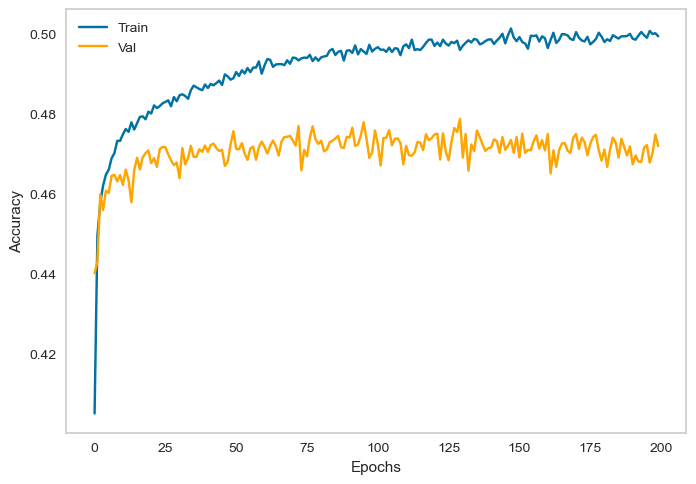

In [94]:
plt.plot(history['accuracy'], label='Train', color='b')
plt.plot(history['val_accuracy'], label='Val', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(False)
plt.legend()
plt.show()

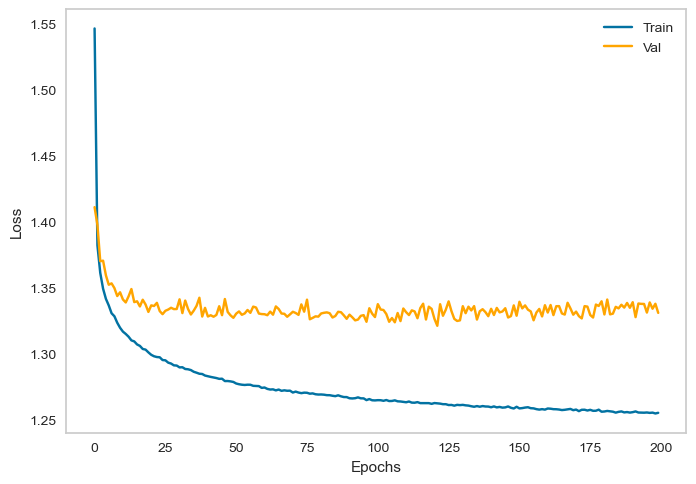

In [93]:
plt.plot(history['loss'], label='Train', color='b')
plt.plot(history['val_loss'], label='Val', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(False)
plt.legend()
plt.show()


In [89]:
y_pred_opt = nn_opt.predict(X_test).astype(int)

In [90]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_opt))
print('F1-score %s' % f1_score(y_test, y_pred_opt, average='weighted'))
print(classification_report(y_test, y_pred_opt, target_names = mapping))

Accuracy 0.4762933484934622
F1-score 0.46761106628843935
              precision    recall  f1-score   support

       angry       0.57      0.52      0.54      1970
       bored       0.52      0.40      0.45      1429
        calm       0.43      0.60      0.50      3683
     excited       0.43      0.50      0.46      2662
       happy       0.48      0.45      0.46      2350
     nervous       0.43      0.29      0.34      1415
    peaceful       0.36      0.33      0.35        90
     pleased       0.44      0.32      0.37      1768
     relaxed       0.48      0.23      0.31       627
         sad       0.68      0.81      0.74      1185
      sleepy       0.43      0.18      0.26       411

    accuracy                           0.48     17590
   macro avg       0.48      0.42      0.44     17590
weighted avg       0.48      0.48      0.47     17590



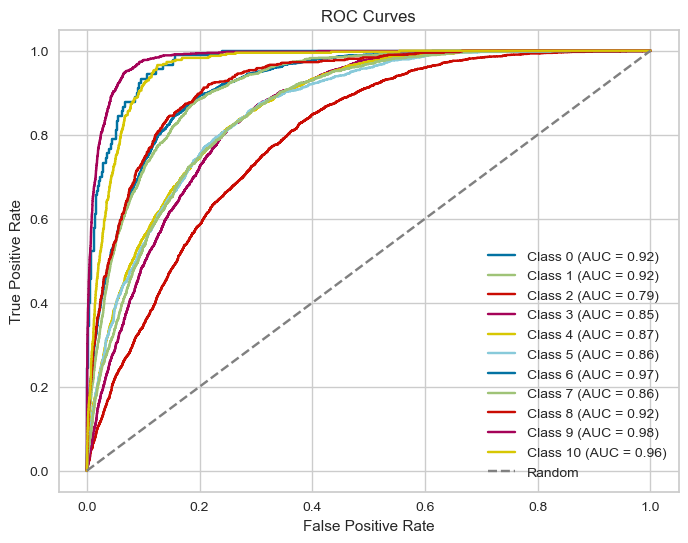

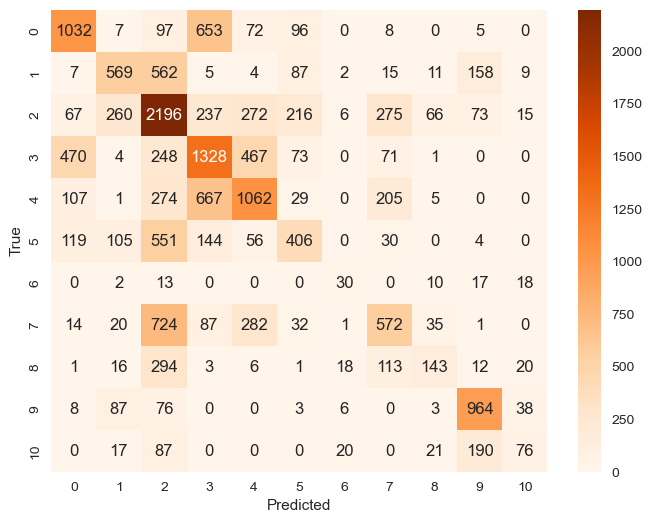

In [91]:
# Assuming `y_test` is your true labels and `y_pred_opt` is your predicted labels

y_probs_opt = nn_opt.predict_proba(X_test)
y_test_binary = np.eye(n_classes)[y_test]

# ROC Curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binary[:, i], y_probs_opt[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Confusion Matrix
cm_opt = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_opt, annot=True, cmap="Oranges", fmt="d", xticklabels=range(n_classes), yticklabels=range(n_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
#plt.title('Confusion Matrix')
plt.show()

## Early Stopping

The most relevant arguments are:

* monitor: quantity to be monitored
* patience: number of epochs with no improvement after which training will be stopped

In [95]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [107]:
#'best_model_NOREG.h5 è il nome arbitrario del file senza regolazione con estensione h5


es = EarlyStopping(monitor='val_accuracy', patience=20, verbose=True) #questi valori, soprattutto della patience può essere cambiato
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_accuracy', save_best_only=True)

nn_es = KerasClassifier(model=build_model_opt(0.01), callbacks=[es, mc])


In [108]:
# clf.fit(X_train, y_train, validation_split=0.2, epochs=500)
nn_es.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=200)

Epoch 1/200
1759/1759 [==============================] - 3s 1ms/step - loss: 1.5424 - accuracy: 0.3978 - val_loss: 1.4229 - val_accuracy: 0.4314
Epoch 2/200
 160/1759 [=>............................] - ETA: 1s - loss: 1.3854 - accuracy: 0.4469

c:\Users\HUAWEI\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1759/1759 [==============================] - 2s 1ms/step - loss: 1.3910 - accuracy: 0.4440 - val_loss: 1.3955 - val_accuracy: 0.4419
Epoch 3/200
1759/1759 [==============================] - 2s 1ms/step - loss: 1.3665 - accuracy: 0.4530 - val_loss: 1.3791 - val_accuracy: 0.4485
Epoch 4/200
1759/1759 [==============================] - 2s 1ms/step - loss: 1.3517 - accuracy: 0.4589 - val_loss: 1.3772 - val_accuracy: 0.4503
Epoch 5/200
1759/1759 [==============================] - 2s 1ms/step - loss: 1.3432 - accuracy: 0.4631 - val_loss: 1.3592 - val_accuracy: 0.4607
Epoch 6/200
1759/1759 [==============================] - 2s 1ms/step - loss: 1.3371 - accuracy: 0.4652 - val_loss: 1.3533 - val_accuracy: 0.4618
Epoch 7/200
1759/1759 [==============================] - 2s 1ms/step - loss: 1.3302 - accuracy: 0.4673 - val_loss: 1.3520 - val_accuracy: 0.4631
Epoch 8/200
1759/1759 [==============================] - 2s 1ms/step - loss: 1.3274 - accuracy: 0.4695 - val_loss: 1.3465 - val_accuracy: 0.46

KerasClassifier(
	model=<keras.src.engine.sequential.Sequential object at 0x0000025DD65FE4D0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.EarlyStopping object at 0x0000025DD69449D0>, <keras.src.callbacks.ModelCheckpoint object at 0x0000025DD6634C10>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [111]:
y_pred_es = nn_es.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_es))
print('F1-score %s' % f1_score(y_test, y_pred_es, average='weighted'))
print(classification_report(y_test, y_pred_es, target_names = mapping))

#patience 10 epochs: Accuracy 0.46474358974358976
#patience 20 epoche: Accuracy 0.4519230769230769


550/550 [==============================] - 0s 770us/step
Accuracy 0.4710631040363843
F1-score 0.4611720261184002
              precision    recall  f1-score   support

       angry       0.56      0.55      0.56      1970
       bored       0.48      0.47      0.47      1429
        calm       0.42      0.59      0.49      3683
     excited       0.45      0.40      0.42      2662
       happy       0.45      0.51      0.48      2350
     nervous       0.45      0.22      0.30      1415
    peaceful       0.35      0.20      0.26        90
     pleased       0.45      0.32      0.37      1768
     relaxed       0.44      0.20      0.28       627
         sad       0.68      0.80      0.73      1185
      sleepy       0.37      0.33      0.35       411

    accuracy                           0.47     17590
   macro avg       0.46      0.42      0.43     17590
weighted avg       0.47      0.47      0.46     17590



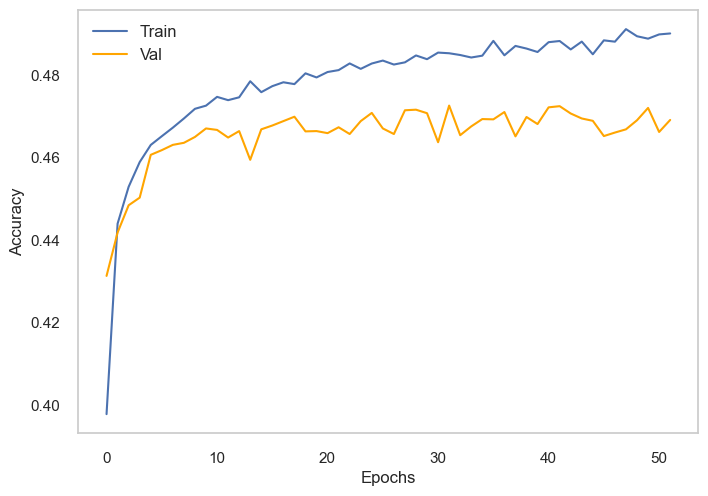

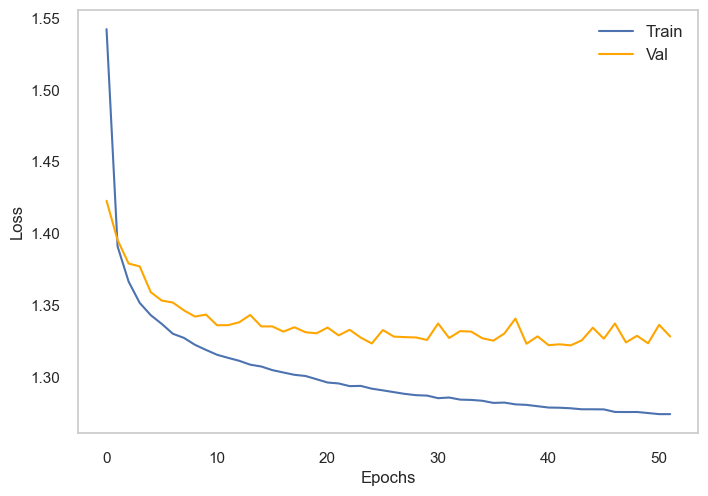

In [144]:
# #con patience 20 epoche
history_es = nn_es.history_

# plt.figure(figsize=(12, 8))

plt.plot(history_es['accuracy'], label='Train')
plt.plot(history_es['val_accuracy'], label='Val', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend(loc='best', fontsize=12)
plt.grid(False)
plt.show()

plt.plot(history_es['loss'], label='Train')
plt.plot(history_es['val_loss'], label='Val', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.xlim(0,50)
plt.legend(loc='best', fontsize=12)
plt.grid(False)
plt.show()

## L2 Regularization

metto parametro di regolaizone ed epoche rilevate prima
poi scelgo L2 Regularization:

- Un valore comune per iniziare è 𝜆=0.01. Questo valore fornisce una penalizzazione moderata e può essere un buon punto di partenza.
- Utilizza una griglia di ricerca per esplorare vari valori di λ. Ad esempio, puoi provare valori come 0.0001, 0.001, 0.01, 0.1

In [113]:
from keras.regularizers import l2, l1

In [121]:
n_classes = 11 #se queste sono le classi per la variabile target, nel nostro caso è diverso, sarebbero il numero di emotions

def build_L2_model(optimizer__learning_rate):

    n_feature = X_train.shape[1]
    #h_dim = 64
    model = Sequential()
    model.add(Dense(65, input_dim=n_feature, activation='relu', kernel_regularizer=l2(0.001))) #questo e quello successivo sono gli hidden layer
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(n_classes, activation='softmax')) #questo dovrebbe essere il layer di uscita

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [122]:
#Modello NN con early stopping + L2
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_accuracy', save_best_only=True)
#                   best_model_L2.keras

nn_L2 = KerasClassifier(model=build_L2_model(0.01), callbacks=[es,mc])  #qui inserisco anche early stopping definito prima

In [123]:
nn_L2.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=200)

Epoch 1/200
1759/1759 [==============================] - 3s 1ms/step - loss: 1.5695 - accuracy: 0.4061 - val_loss: 1.4754 - val_accuracy: 0.4267
Epoch 2/200
 163/1759 [=>............................] - ETA: 1s - loss: 1.4404 - accuracy: 0.4580

c:\Users\HUAWEI\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1759/1759 [==============================] - 2s 1ms/step - loss: 1.4430 - accuracy: 0.4448 - val_loss: 1.4527 - val_accuracy: 0.4306
Epoch 3/200
1759/1759 [==============================] - 2s 1ms/step - loss: 1.4186 - accuracy: 0.4520 - val_loss: 1.4245 - val_accuracy: 0.4506
Epoch 4/200
1759/1759 [==============================] - 2s 1ms/step - loss: 1.4030 - accuracy: 0.4579 - val_loss: 1.4216 - val_accuracy: 0.4471
Epoch 5/200
1759/1759 [==============================] - 2s 1ms/step - loss: 1.3937 - accuracy: 0.4597 - val_loss: 1.4033 - val_accuracy: 0.4582
Epoch 6/200
1759/1759 [==============================] - 2s 1ms/step - loss: 1.3870 - accuracy: 0.4632 - val_loss: 1.3967 - val_accuracy: 0.4574
Epoch 7/200
1759/1759 [==============================] - 3s 2ms/step - loss: 1.3799 - accuracy: 0.4649 - val_loss: 1.3974 - val_accuracy: 0.4552
Epoch 8/200
1759/1759 [==============================] - 5s 3ms/step - loss: 1.3775 - accuracy: 0.4667 - val_loss: 1.3859 - val_accuracy: 0.46

KerasClassifier(
	model=<keras.src.engine.sequential.Sequential object at 0x0000025DDC584210>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.EarlyStopping object at 0x0000025DD69449D0>, <keras.src.callbacks.ModelCheckpoint object at 0x0000025DDC9D3250>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [126]:
y_pred_L2 = nn_L2.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_L2))
print('F1-score %s' % f1_score(y_test, y_pred_L2, average='weighted'))
print(classification_report(y_test, y_pred_L2, target_names=mapping))

550/550 [==============================] - 0s 793us/step
Accuracy 0.4723706651506538
F1-score 0.46095621437505746
              precision    recall  f1-score   support

       angry       0.55      0.57      0.56      1970
       bored       0.51      0.46      0.48      1429
        calm       0.41      0.61      0.49      3683
     excited       0.44      0.44      0.44      2662
       happy       0.47      0.43      0.45      2350
     nervous       0.42      0.33      0.37      1415
    peaceful       0.42      0.09      0.15        90
     pleased       0.47      0.26      0.34      1768
     relaxed       0.47      0.19      0.27       627
         sad       0.67      0.82      0.74      1185
      sleepy       0.42      0.17      0.24       411

    accuracy                           0.47     17590
   macro avg       0.48      0.40      0.41     17590
weighted avg       0.47      0.47      0.46     17590



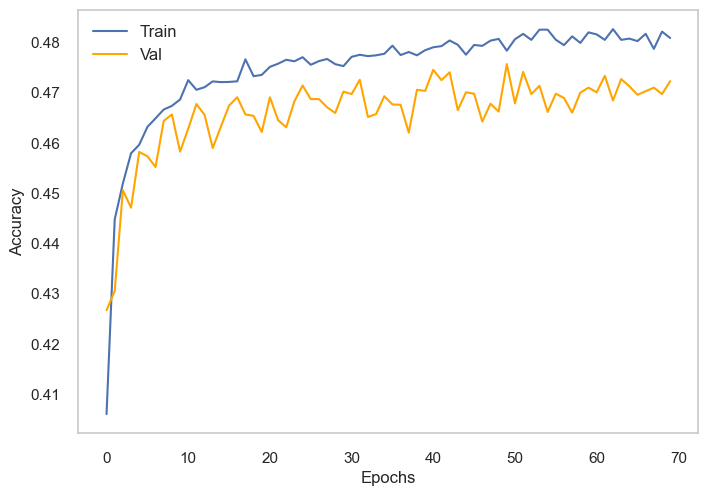

In [127]:
history = nn_L2.history_

# plt.figure(figsize=(12, 8))

plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend(loc='best', fontsize=12)
plt.grid(False)
plt.show()


In [128]:
#Provo con altri valori del kernel (sopra è 0.001, qui sarà 0.005)

n_classes = 11

def build_L2_model(optimizer__learning_rate):

    n_feature = X_train.shape[1]
    #h_dim = 64
    model = Sequential()
    model.add(Dense(64, input_dim=n_feature, activation='relu', kernel_regularizer=l2(0.005))) #questo e quello successivo sono gli hidden layer
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.005)))
    model.add(Dense(n_classes, activation='softmax')) #questo dovrebbe essere il layer di uscita

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="sgd", metrics=['accuracy'])
    return model

In [129]:
#Modello NN con early stopping + L2
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_accuracy', save_best_only=True)

nn_L2 = KerasClassifier(model=build_L2_model(0.01), callbacks=[es,mc])

In [130]:
nn_L2.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=200)

Epoch 1/200
1759/1759 [==============================] - 5s 2ms/step - loss: 1.9524 - accuracy: 0.3715 - val_loss: 1.7359 - val_accuracy: 0.4090
Epoch 2/200
  65/1759 [>.............................] - ETA: 2s - loss: 1.7243 - accuracy: 0.4178

c:\Users\HUAWEI\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1759/1759 [==============================] - 6s 4ms/step - loss: 1.6771 - accuracy: 0.4226 - val_loss: 1.6612 - val_accuracy: 0.4088
Epoch 3/200
1759/1759 [==============================] - 4s 2ms/step - loss: 1.6125 - accuracy: 0.4267 - val_loss: 1.6206 - val_accuracy: 0.4244
Epoch 4/200
1759/1759 [==============================] - 5s 3ms/step - loss: 1.5687 - accuracy: 0.4310 - val_loss: 1.5660 - val_accuracy: 0.4235
Epoch 5/200
1759/1759 [==============================] - 6s 3ms/step - loss: 1.5383 - accuracy: 0.4343 - val_loss: 1.5402 - val_accuracy: 0.4300
Epoch 6/200
1759/1759 [==============================] - 6s 3ms/step - loss: 1.5175 - accuracy: 0.4366 - val_loss: 1.5214 - val_accuracy: 0.4306
Epoch 7/200
1759/1759 [==============================] - 6s 3ms/step - loss: 1.5011 - accuracy: 0.4389 - val_loss: 1.5180 - val_accuracy: 0.4244
Epoch 8/200
1759/1759 [==============================] - 5s 3ms/step - loss: 1.4891 - accuracy: 0.4408 - val_loss: 1.4969 - val_accuracy: 0.43

KerasClassifier(
	model=<keras.src.engine.sequential.Sequential object at 0x0000025DE2DDB1D0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.EarlyStopping object at 0x0000025DD69449D0>, <keras.src.callbacks.ModelCheckpoint object at 0x0000025DE2D79790>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [131]:
y_pred_L2 = nn_L2.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_L2))
print('F1-score %s' % f1_score(y_test, y_pred_L2, average='weighted'))
print(classification_report(y_test, y_pred_L2)) #rispetto a 47,23?? peggio

550/550 [==============================] - 2s 4ms/step
Accuracy 0.4579306424104605
F1-score 0.43857039268256603
              precision    recall  f1-score   support

           0       0.58      0.49      0.53      1970
           1       0.53      0.28      0.37      1429
           2       0.40      0.67      0.50      3683
           3       0.42      0.45      0.43      2662
           4       0.45      0.50      0.47      2350
           5       0.45      0.20      0.28      1415
           6       0.00      0.00      0.00        90
           7       0.48      0.21      0.29      1768
           8       0.44      0.16      0.24       627
           9       0.64      0.82      0.72      1185
          10       0.32      0.30      0.31       411

    accuracy                           0.46     17590
   macro avg       0.43      0.37      0.38     17590
weighted avg       0.47      0.46      0.44     17590



c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


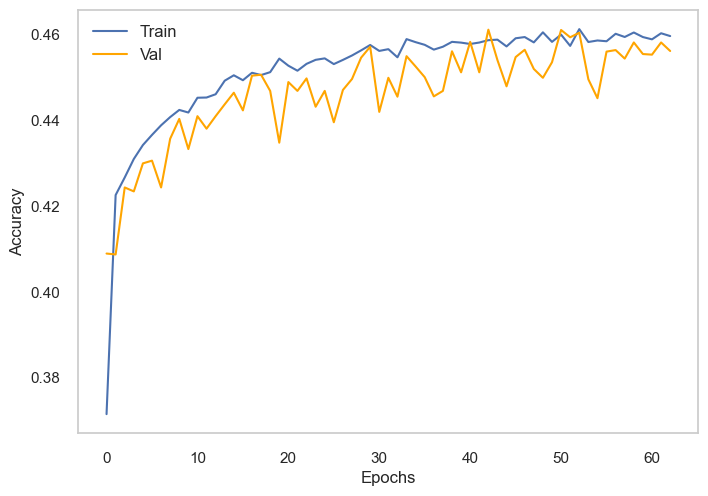

In [132]:
#Con kernel regulizer di 0.005
history_l2 = nn_L2.history_

plt.plot(history_l2['accuracy'], label='Train')
plt.plot(history_l2['val_accuracy'], label='Val', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend(loc='best', fontsize=12)
plt.grid(False)
plt.show()

plt.plot(history_l2['loss'], label='Train')
plt.plot(history_l2['val_loss'], label='Val', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.xlim(0,50)
plt.legend(loc='best', fontsize=12)
plt.grid(False)
plt.show()


## Dropout

Il meccanismo di regolarizzazione Dropout è una tecnica utilizzata nelle reti neurali per prevenire l'overfitting. Dropout agisce disattivando casualmente un certo numero di unità (neuroni) nel layer durante la fase di addestramento.

valori tipici per il tasso di Dropout p variano tra 0.2 e 0.5. Un tasso di 0.3, come nell'esempio sopra, è comunemente usato e rappresenta un buon punto di partenza.


In [133]:
from keras.layers import Dropout

In [134]:
n_classes = 11 #se queste sono le classi per la variabile target, nel nostro caso è diverso, sarebbero il numero di emotions
def build_DROPOUT_model(optimizer__learning_rate):

    n_feature = X_train.shape[1]
    h_dim = 64
    model = Sequential()
    model.add(Dense(h_dim, input_dim=n_feature, activation='relu')) #questo e quello successivo sono gli hidden layer
    model.add(Dropout(0.3))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(n_classes, activation='softmax')) #questo dovrebbe essere il layer di uscita

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="sgd", metrics=['accuracy'])
    return model


In [135]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_accuracy', save_best_only=True)

nn_do = KerasClassifier(build_DROPOUT_model(0.01), callbacks=[es,mc])

In [136]:
nn_do.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=200)

Epoch 1/200
1759/1759 [==============================] - 5s 3ms/step - loss: 1.9028 - accuracy: 0.2898 - val_loss: 1.5770 - val_accuracy: 0.3914
Epoch 2/200
  60/1759 [>.............................] - ETA: 4s - loss: 1.6932 - accuracy: 0.3505

c:\Users\HUAWEI\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1759/1759 [==============================] - 5s 3ms/step - loss: 1.6311 - accuracy: 0.3660 - val_loss: 1.5004 - val_accuracy: 0.3998
Epoch 3/200
1759/1759 [==============================] - 7s 4ms/step - loss: 1.5721 - accuracy: 0.3844 - val_loss: 1.4706 - val_accuracy: 0.4154
Epoch 4/200
1759/1759 [==============================] - 6s 3ms/step - loss: 1.5400 - accuracy: 0.3952 - val_loss: 1.4525 - val_accuracy: 0.4208
Epoch 5/200
1759/1759 [==============================] - 5s 3ms/step - loss: 1.5182 - accuracy: 0.4031 - val_loss: 1.4385 - val_accuracy: 0.4251
Epoch 6/200
1759/1759 [==============================] - 5s 3ms/step - loss: 1.5053 - accuracy: 0.4062 - val_loss: 1.4340 - val_accuracy: 0.4242
Epoch 7/200
1759/1759 [==============================] - 6s 3ms/step - loss: 1.4960 - accuracy: 0.4111 - val_loss: 1.4281 - val_accuracy: 0.4225
Epoch 8/200
1759/1759 [==============================] - 5s 3ms/step - loss: 1.4869 - accuracy: 0.4146 - val_loss: 1.4180 - val_accuracy: 0.43

KerasClassifier(
	model=<keras.src.engine.sequential.Sequential object at 0x0000025DDC5D2010>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.EarlyStopping object at 0x0000025DD69449D0>, <keras.src.callbacks.ModelCheckpoint object at 0x0000025DE3035F10>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [137]:
y_pred_do = nn_do.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_do))
print('F1-score %s' % f1_score(y_test, y_pred_do, average='weighted'))
print(classification_report(y_test, y_pred_do, target_names= mapping))

550/550 [==============================] - 1s 2ms/step
Accuracy 0.4611711199545196
F1-score 0.4457276436727699
              precision    recall  f1-score   support

       angry       0.55      0.56      0.56      1970
       bored       0.51      0.35      0.41      1429
        calm       0.40      0.65      0.50      3683
     excited       0.41      0.45      0.43      2662
       happy       0.47      0.43      0.45      2350
     nervous       0.41      0.29      0.34      1415
    peaceful       0.50      0.04      0.08        90
     pleased       0.46      0.26      0.33      1768
     relaxed       0.49      0.12      0.19       627
         sad       0.68      0.77      0.72      1185
      sleepy       0.44      0.10      0.16       411

    accuracy                           0.46     17590
   macro avg       0.48      0.37      0.38     17590
weighted avg       0.47      0.46      0.45     17590



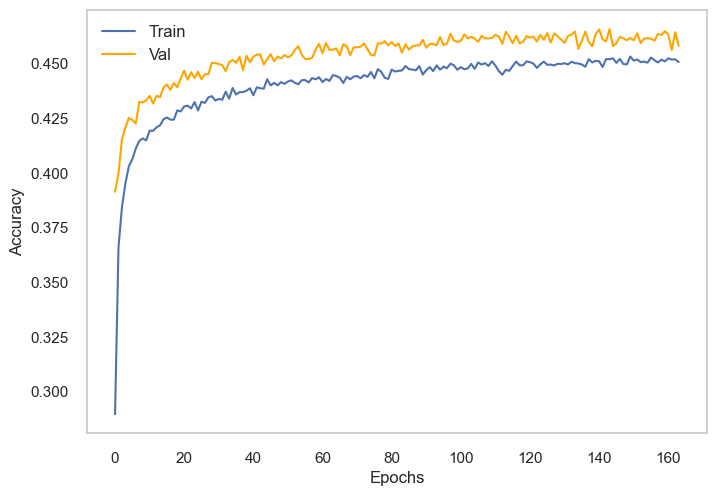

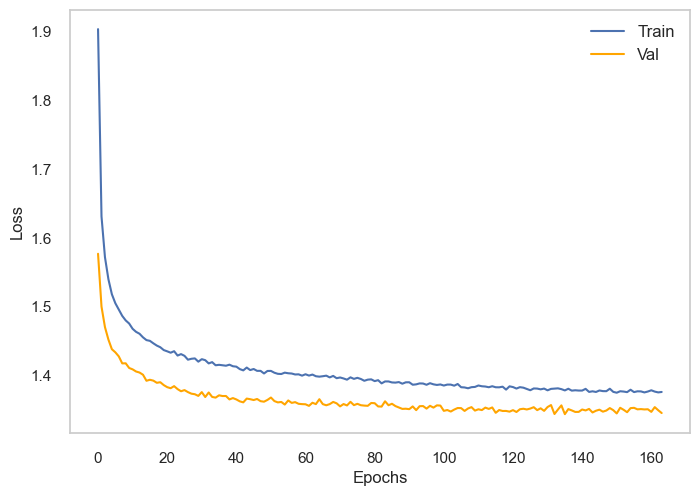

In [139]:
history_do = nn_do.history_

plt.plot(history_do['accuracy'], label='Train')
plt.plot(history_do['val_accuracy'], label='Val', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend(loc='best', fontsize=12)
plt.grid(False)
plt.show()

plt.plot(history_do['loss'], label='Train')
plt.plot(history_do['val_loss'], label='Val', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.xlim(0,50)
plt.legend(loc='best', fontsize=12)
plt.grid(False)
plt.show()

## Model Comparison

In [141]:
# laod best models and test them
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

550/550 [==============================] - 1s 2ms/step - loss: 1.3389 - accuracy: 0.4612


In [147]:
print('Early Stopping:')
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('L2:')
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Drop out:')
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Early Stopping:
Loss 1.316889, Accuracy 0.471234
L2:
Loss 1.409919, Accuracy 0.456794
Drop out:
Loss 1.338907, Accuracy 0.461228
